## NLP

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import textblob
from textblob import TextBlob

### Reading the data into a DF

In [2]:
clothing=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
clothing

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


### Filtering the dataframe to a relevant subset

In [4]:
clothing=clothing.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Recommended IND', 'Positive Feedback Count', 'Class Name'], axis=1)

In [5]:
# also: df=df[['Title', 'Review Text', ...]]

### Stantardising column names

In [6]:
clothing.columns.str.lower()

Index(['title', 'review text', 'rating', 'division name', 'department name'], dtype='object')

In [9]:
clothing.columns = [col.lower().replace(' ','_') for col in clothing.columns]

In [10]:
clothing

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


### EDA

In [12]:
clothing.shape

(23486, 5)

In [14]:
clothing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division_name    23472 non-null  object
 4   department_name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [16]:
clothing.isna().sum() #how many nulls per column

title              3810
review_text         845
rating                0
division_name        14
department_name      14
dtype: int64

In [18]:
clothing.isna().sum()/len(clothing) * 100 #extra: looking at percentage of nulls

title              16.222430
review_text         3.597888
rating              0.000000
division_name       0.059610
department_name     0.059610
dtype: float64

In [19]:
clothing.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<AxesSubplot:>

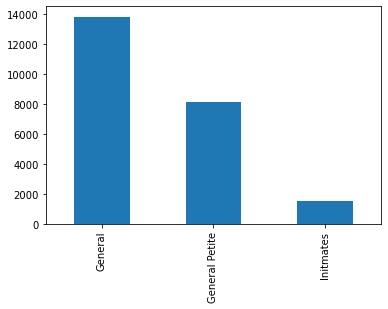

In [20]:
# visualising how many in division_name
clothing['division_name'].value_counts().plot(kind='bar') 

<AxesSubplot:>

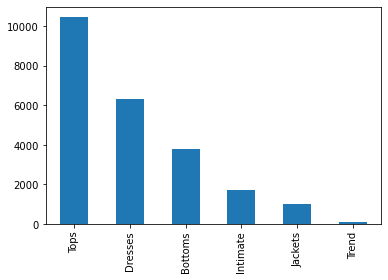

In [21]:
# visualising how many in department_name
clothing['department_name'].value_counts().plot(kind='bar')

In [23]:
clothing['review_text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: review_text, Length: 23486, dtype: object

In [24]:
# defining a function for visualising the length for every review
def get_len(x):
    if x==x:
        return len(x)
    else:
        return 0

In [26]:
clothing['review_text'].apply(get_len)

0         53
1        303
2        500
3        124
4        192
        ... 
23481    131
23482    223
23483    208
23484    427
23485    110
Name: review_text, Length: 23486, dtype: int64

In [27]:
# adding the length of the reviews as a column in the dataframe
clothing['len_review'] = clothing['review_text'].apply(get_len)

In [28]:
clothing

,title,review_text,rating,division_name,department_name,len_review
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,53
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,303
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,500
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,124
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,192
...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,131
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,223
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,208
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,427


In [29]:
# you can also use a lambda function to do that. 
#This way: clothing['len_review'] = clothing['review_text'].apply(lambda x: get_len(x))

<AxesSubplot:xlabel='len_review', ylabel='Count'>

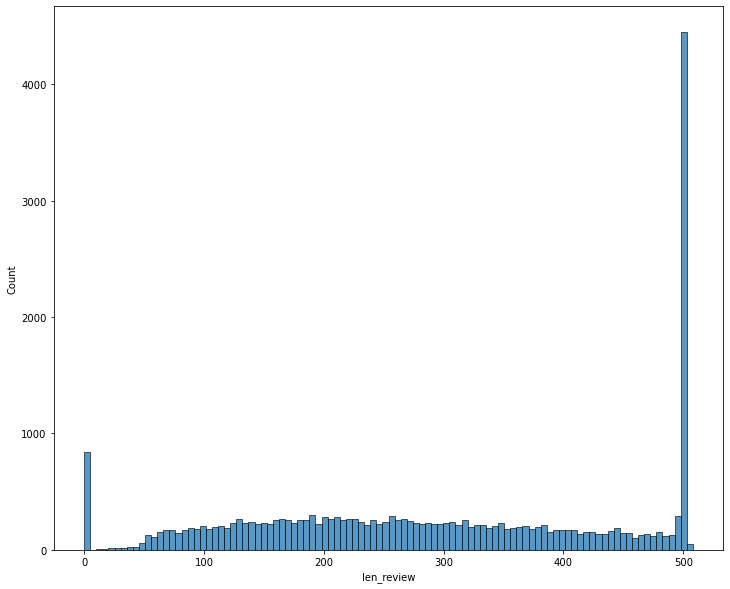

In [32]:
# plotting the length of the reviews
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(clothing['len_review'], bins=100, ax=ax)

In [33]:
#let's look at the largest reviews
clothing[clothing['len_review'] == 500]

,title,review_text,rating,division_name,department_name,len_review
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,500
14,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,General,Dresses,500
21,I'm torn!,"I'm upset because for the price of the dress, ...",4,General,Dresses,500
26,Huge disappointment,I have been waiting for this sweater coat to s...,2,General,Tops,500
53,Flattering and comfortable,Very soft and comfortable. the shirt has an un...,5,General,Tops,500
...,...,...,...,...,...,...
23467,Super flattering!,"I worry when i have an elastic waist, or somet...",5,General Petite,Dresses,500
23473,Perfect dress,Great quality and extremely flattering. bonus ...,5,General Petite,Dresses,500
23474,Much better in person!,"Yes, this is a great dress! i wasn't sure abou...",5,General Petite,Dresses,500
23477,Entrancing,I'm so impressed with the beautiful color comb...,4,General Petite,Dresses,500


In [34]:
#let's take one review 
clothing[clothing['len_review'] == 500]['review_text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

<AxesSubplot:xlabel='len_review', ylabel='Count'>

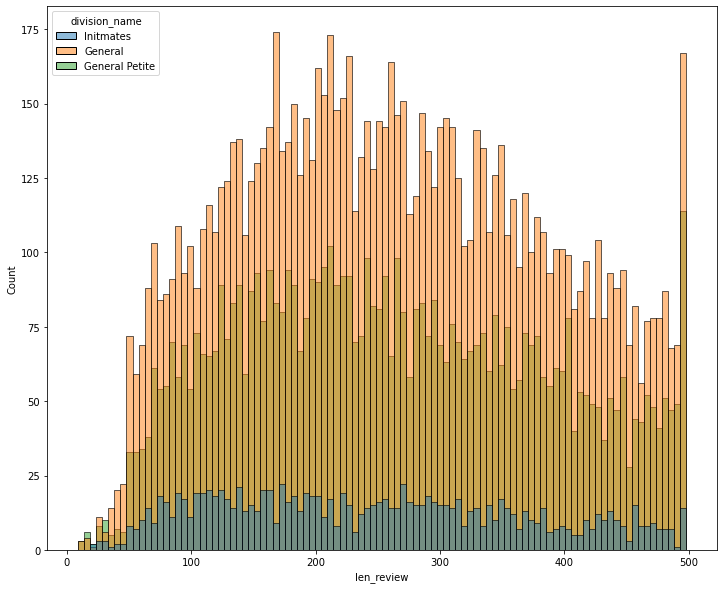

In [35]:
# visualising the length of the reviews for division_name
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(clothing[(clothing['len_review'] < 499) & (clothing['len_review'] !=0)],
             x='len_review',
             bins=100,
             ax=ax, 
             hue='division_name')

<AxesSubplot:xlabel='len_review', ylabel='Count'>

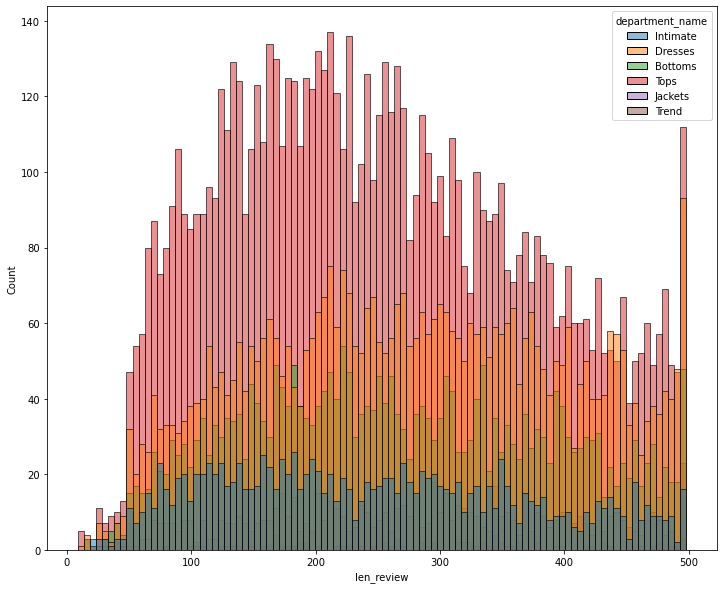

In [36]:
# visualising the length of the reviews for department_name
fig, ax = plt.subplots(figsize=(12,10))
sns.histplot(clothing[(clothing['len_review'] < 499) & (clothing['len_review'] !=0)],
             x='len_review',
             bins=100,
             ax=ax, 
             hue='department_name')

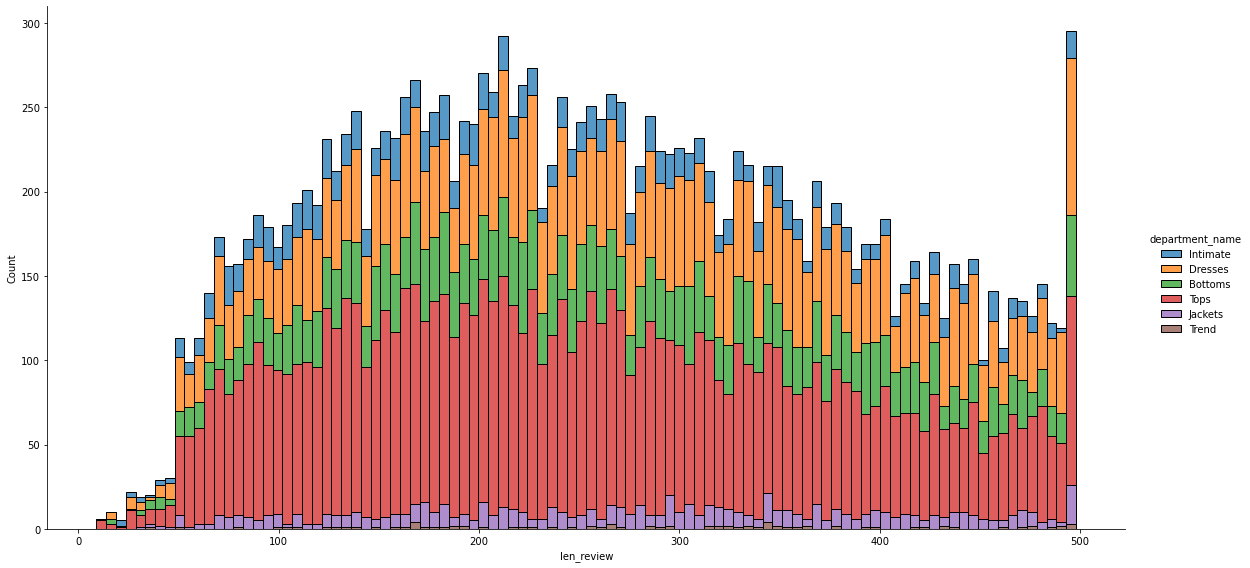

In [40]:
sns.displot(data=clothing[(clothing['len_review'] < 499) & (clothing['len_review'] !=0)],
             x='len_review',
             hue='department_name',
             multiple='stack',
             bins=100,
             height=8, 
             aspect=2
            )

### Summarising the average rating by division and department as a new dataframe

In [41]:
clothing.head()

,title,review_text,rating,division_name,department_name,len_review
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,53
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,303
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,500
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,124
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,192


In [42]:
clothing_avg_div_dep = clothing.groupby(['division_name', 'department_name']).agg({'rating':'mean'}).reset_index()

In [43]:
clothing_avg_div_dep

,division_name,department_name,rating
0,General,Bottoms,4.268686
1,General,Dresses,4.163003
2,General,Jackets,4.240310
3,General,Tops,4.148749
4,General,Trend,3.822917
5,General Petite,Bottoms,4.329356
6,General Petite,Dresses,4.133256
7,General Petite,Intimate,4.240343
8,General Petite,Jackets,4.304910
9,General Petite,Tops,4.216469


In [44]:
clothing_avg_div_dep['div_dep']=clothing_avg_div_dep['division_name'] + clothing_avg_div_dep['department_name']

<AxesSubplot:ylabel='div_dep'>

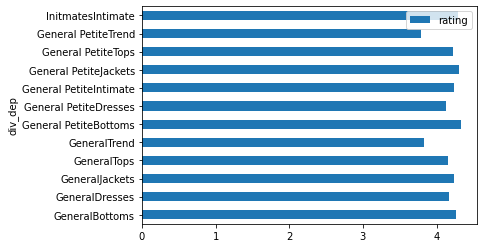

In [45]:
clothing_avg_div_dep.plot(kind='barh', y='rating', x='div_dep')

### Sentiment analysis

In [47]:
clothing.head(10)

,title,review_text,rating,division_name,department_name,len_review
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,53
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,303
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,500
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,124
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,192
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses,488
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,General Petite,Tops,496
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,General Petite,Tops,482
8,Flattering,I love this dress. i usually get an xs but it ...,5,General,Dresses,166
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,General,Dresses,360


##### Example 1

In [49]:
clothing.iloc[5]['review_text']

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [50]:
review5=clothing.iloc[5]['review_text']

In [51]:
TextBlob(review5)

TextBlob("I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.")

In [52]:
text_review5 = TextBlob(review5)

In [53]:
text_review5.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

##### Example 2

In [73]:
review6=clothing.iloc[6]['review_text']

In [74]:
TextBlob(review6)

TextBlob("I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.")

In [75]:
text_review6 = TextBlob(review6)

In [76]:
text_review6.sentiment

Sentiment(polarity=0.13375, subjectivity=0.6077777777777778)

##### Example 3

In [79]:
review7=clothing.iloc[7]['review_text']

In [80]:
TextBlob(review7)

TextBlob("I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...")

In [81]:
text_review7 = TextBlob(review7)

In [82]:
text_review7.sentiment

Sentiment(polarity=0.17163461538461539, subjectivity=0.49615384615384617)

##### Sentences for example 1

In [54]:
text_review5.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

### Removing any rows in the data which contain null in the review column

In [55]:
clothing['review_text'].isna().sum()

845

In [56]:
clothing=clothing.dropna(subset=['review_text'], how='any')

In [57]:
clothing

,title,review_text,rating,division_name,department_name,len_review
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,53
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,303
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,500
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,124
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,192
...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,131
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,223
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,208
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,427


### Defining a function to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame

In [58]:
def get_polarity(review5):
    return TextBlob(review5).sentiment.polarity

In [59]:
clothing['polarity']=clothing['review_text'].apply(get_polarity)

<ipython-input-59-bf2d15b8d46e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clothing['polarity']=clothing['review_text'].apply(get_polarity)


In [60]:
clothing

,title,review_text,rating,division_name,department_name,len_review,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,53,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,303,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,500,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,124,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,192,0.512891
...,...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,131,0.552667
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,223,0.091667
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,208,0.414286
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,427,0.322222


### Using the pandas groupby function again for summarising the minimum review polarity, by division and department as a new dataframe

In [61]:
clothing.groupby(['division_name', 'department_name']).agg({'polarity':'min'})

polarity
division_name  department_name          
General        Bottoms         -0.533333
               Dresses         -0.916667
               Jackets         -0.750000
               Tops            -0.975000
               Trend           -0.270833
General Petite Bottoms         -0.257778
               Dresses         -0.400000
               Intimate        -0.575000
               Jackets         -0.562500
               Tops            -0.700000
               Trend           -0.083333
Initmates      Intimate        -0.392333

In [62]:
clothing_min_pol=clothing.groupby(['division_name', 'department_name']).agg({'polarity':'min'}).reset_index()

In [63]:
clothing_min_pol

,division_name,department_name,polarity
0,General,Bottoms,-0.533333
1,General,Dresses,-0.916667
2,General,Jackets,-0.750000
3,General,Tops,-0.975000
4,General,Trend,-0.270833
5,General Petite,Bottoms,-0.257778
6,General Petite,Dresses,-0.400000
7,General Petite,Intimate,-0.575000
8,General Petite,Jackets,-0.562500
9,General Petite,Tops,-0.700000


In [64]:
clothing_min_pol['div_dep']=clothing_min_pol['division_name'] + ' ' + clothing_min_pol['department_name']

In [65]:
clothing_min_pol

,division_name,department_name,polarity,div_dep
0,General,Bottoms,-0.533333,General Bottoms
1,General,Dresses,-0.916667,General Dresses
2,General,Jackets,-0.750000,General Jackets
3,General,Tops,-0.975000,General Tops
4,General,Trend,-0.270833,General Trend
5,General Petite,Bottoms,-0.257778,General Petite Bottoms
6,General Petite,Dresses,-0.400000,General Petite Dresses
7,General Petite,Intimate,-0.575000,General Petite Intimate
8,General Petite,Jackets,-0.562500,General Petite Jackets
9,General Petite,Tops,-0.700000,General Petite Tops


### Using the pandas groupby function again for summarising the average review polarity, by division and department as a new dataframe 

In [71]:
clothing_mean_pol=clothing.groupby(['division_name', 'department_name']).agg({'polarity':'mean'}).reset_index()

<AxesSubplot:ylabel='div_dep'>

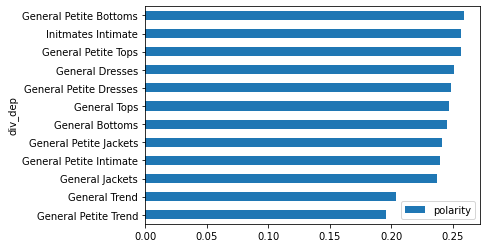

In [72]:
clothing_mean_pol=clothing_mean_pol.sort_values(by='polarity')
clothing_mean_pol['div_dep']=clothing_mean_pol['division_name'] + ' ' + clothing_mean_pol['department_name']
clothing_mean_pol.plot(kind='barh', y='polarity', x='div_dep')